In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax'),
])

224 x 224 크기의 이미지 입력
relu(rectified linear unit)
0 이하의 값은 다음 레이어에 전달 X
0 이상의 값은 그대로 출력

Pooling
2차원배열에서 지정된 크기의 공간안에서 평균값수치를 뽑아냄 -> 이미지의 크기를 줄이면서 과적합을 막아줌
maxPooling 최댓값만 뽑아냄

softmax
결과의 예측을 0~1사이 값으로 예측함
모든 클래스의 예측값의 합은 1이 아님

sigmoid
결과의 예측을 0~1사이 값으로 예측함
모든 클래스의 예측값의 합은 1임

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
dataset_name = 'cats_vs_dogs'
train_dataset = tfds.load(name=dataset_name, split='train[:80%]')
valid_dataset = tfds.load(name=dataset_name, split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteLOJJSU/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
def preprocess(data):
    # x, y 데이터를 정의합니다.
    x = data['image']
    y = data['label']
    # image 정규화(Normalization)
    x = x / 255
    # 사이즈를 (224, 224)로 변환합니다.
    x = tf.image.resize(x, size=(224, 224))
    # x, y  데이터를 return 합니다.
    return x, y

In [ ]:
batch_size = 64
train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/python/mycheckpoint/my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data,
          validation_data=(valid_data),
          epochs=20,
          callbacks=[checkpoint],
          )

Epoch 1/20
291/291 [==============================] - ETA: 0s - loss: 0.6887 - acc: 0.5346
Epoch 1: val_loss improved from inf to 0.65211, saving model to /content/drive/MyDrive/python/mycheckpoint/my_checkpoint.ckpt
291/291 [==============================] - 107s 325ms/step - loss: 0.6887 - acc: 0.5346 - val_loss: 0.6521 - val_acc: 0.6146
Epoch 2/20
291/291 [==============================] - ETA: 0s - loss: 0.6093 - acc: 0.6625
Epoch 2: val_loss improved from 0.65211 to 0.53740, saving model to /content/drive/MyDrive/python/mycheckpoint/my_checkpoint.ckpt
291/291 [==============================] - 90s 308ms/step - loss: 0.6093 - acc: 0.6625 - val_loss: 0.5374 - val_acc: 0.7270
Epoch 3/20
291/291 [==============================] - ETA: 0s - loss: 0.4839 - acc: 0.7660
Epoch 3: val_loss improved from 0.53740 to 0.42060, saving model to /content/drive/MyDrive/python/mycheckpoint/my_checkpoint.ckpt
291/291 [==============================] - 89s 306ms/step - loss: 0.4839 - acc: 0.7660 - val

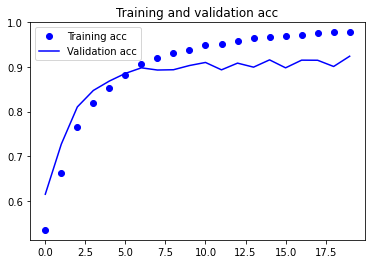

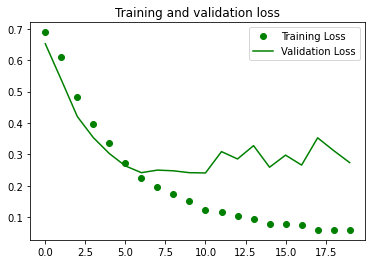

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.load_weights(checkpoint_path)

Saving 산타고양이.jpg to 산타고양이.jpg


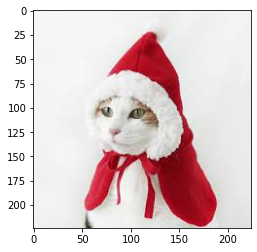

[1.0000000e+00 2.5813988e-27]
산타고양이.jpg is a cat


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as img

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/drive/MyDrive/python/picture/' + fn
  img=image.load_img(path, target_size=(224, 224))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)
  plt.imshow(img)
  plt.show()
  print(classes[0])

  if classes[0][0] > 0:
    print(fn + " is a cat")
  else:
    print(fn + " is a dog")